# Fourier Transforms Plots

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, ion, draw
import ffmpeg

(0.0, 1.0)

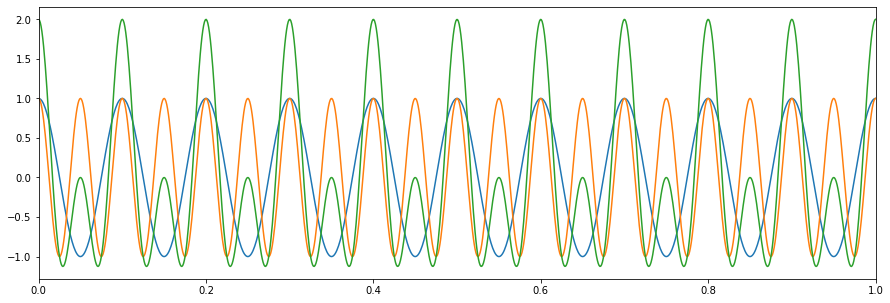

In [144]:
plt.figure(figsize = (15, 5))
res = 1000
wave1 =  np.sin(np.linspace(np.pi/2, np.pi*20 + np.pi/2, res)) # 10 hz
wave2 =  np.sin(np.linspace(np.pi/2, np.pi*40 + np.pi/2, res)) # 20 hz
plt.plot(np.linspace(0, 1, res), wave1)
plt.plot(np.linspace(0, 1, res), wave2 )
plt.plot(np.linspace(0, 1, res), (wave1+wave2) )
plt.xlim(0, 1)

In [525]:
wave1 =  np.sin(np.linspace(np.pi/2, np.pi*20 + np.pi/2, res)) + 2
wave2 =  np.sin(np.linspace(np.pi/2, np.pi*40 + np.pi/2, res)) + 2
wave3 = wave1+wave2

waves = [wave1, wave2, wave3]

In [526]:
def to_complex(mag, theta):
    return mag * np.exp(theta*1j)

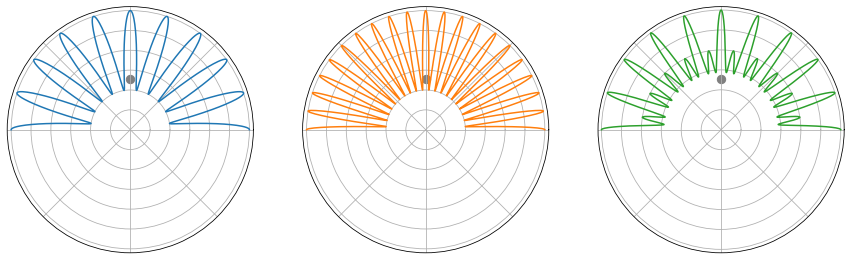

In [531]:
fig = plt.figure(figsize = (15, 5))
plots = []
f = 0.5
for i in range(3):
    plots.append(fig.add_subplot(130+i+1,projection='polar'))

    a = np.mean(to_complex(abs(waves[i]), 2*np.pi*np.linspace(0, f, res)))

    plots[i].scatter(np.angle(a), abs(a), c= "grey", s = 70)
    
    plots[i].plot(2*np.pi*np.linspace(0, f, res), waves[i], c = "C" + str(i))
    plots[i].set_yticklabels([])
    plots[i].set_xticklabels([])


In [529]:
a

(4.547473508864641e-13+2541.937784329353j)

In [516]:
frequencies

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [517]:
from celluloid import Camera

STEP:  0.0249


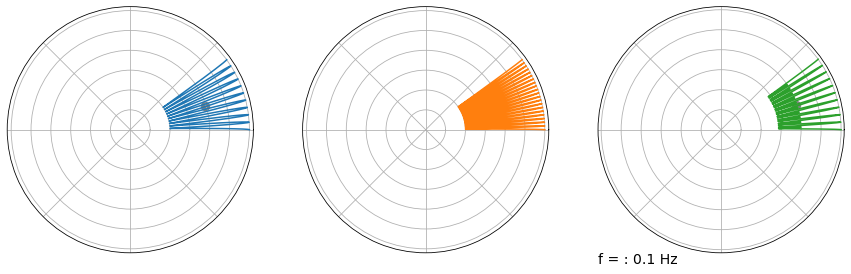

In [536]:
fig = plt.figure(figsize = (15, 7))
camera = Camera(fig)
plots = []
for i in range(3):
    plots.append(fig.add_subplot(130+i+1,projection='polar'))
    
# frequencies, step = np.linspace(0.1, 50, 1001, retstep = True)

frequencies, step = np.linspace(0.1, 25, 1001, retstep = True)
print("STEP: ", step)

cent = []
for f in frequencies:

    for i in range(3):

        plots[i].plot(2*np.pi*np.linspace(0, f, res), waves[i], c = "C" + str(i))
        plots[i].set_yticklabels([])
        plots[i].set_xticklabels([])
        
        a = np.mean(to_complex(abs(waves[i]), 2*np.pi*np.linspace(0, f, res)))
        plots[i].scatter(np.angle(a), abs(a), c= "grey", s = 70)
        
        
    plots[0].text(0, 0, "f = : " + str(round(f,2)) + " Hz", transform= plots[i].transAxes, fontsize=14,
        verticalalignment='top')
    
    cent.append(abs(a))
    
    
    plt.clf
    camera.snap()
#     plt.legend()

    plt.show()
# draw()


In [537]:
animation = camera.animate(interval = 20, repeat = True, repeat_delay = 5000)

In [538]:
animation.save('animation_0_25_centroid.gif', writer='PillowWriter', fps=30)

MovieWriter PillowWriter unavailable; using Pillow instead.


In [535]:
from IPython.display import HTML
HTML(animation.to_html5_video())

2.171258662545884e-12
-2.1712586625459665e-12
0.0


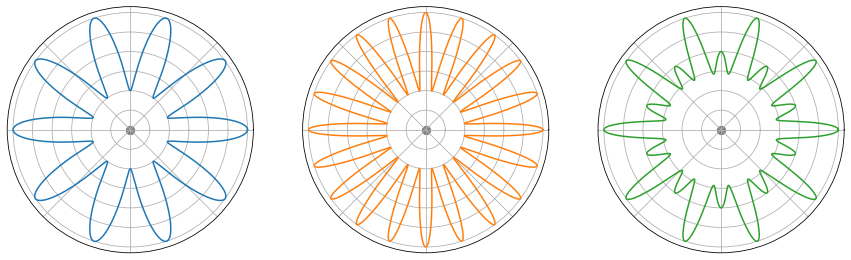

In [462]:
fig = plt.figure(figsize = (15, 5))
plots = []
f =1
for i in range(3):
    plots.append(fig.add_subplot(130+i+1,projection='polar'))


    plots[i].plot(2*np.pi*np.linspace(0, f, res), waves[i], c = "C" + str(i))
    
    a = np.mean(to_complex(waves[i], 2*np.pi*np.linspace(0, f, res)))
    print(np.angle(a, deg = True))
    plots[i].scatter(np.angle(a), a.real, c= "grey", s = 70)
    
    plots[i].set_yticklabels([])
    plots[i].set_xticklabels([])


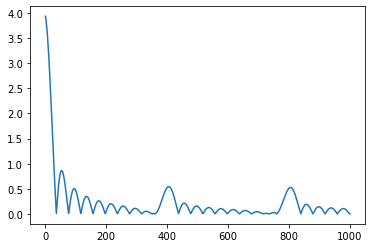

In [539]:
plt.plot(cent)